# Final Project Report

* Class: DS 5100
* Student Name: Bereket Tafesse
* Student Net ID: uqs3dq
* This URL: <https://github.com/berekettafesse/ds5100-finalproject-uqs3dq/blob/main/DS51200_FinalProjectTemplate.ipynb>

# Instructions

Follow the instructions in the Final Project isntructions notebook and put evidence of your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL: https://github.com/berekettafesse/ds5100-finalproject-uqs3dq

Paste a copyy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

```python
import numpy as np
import pandas as pd
import random

class Die:
    """An object with faces and weights that can be rolled to get results and be used in a game"""
    
    def __init__(self, faces):
        """Initializes Die object to have weight = 1.0 for all faces.
        
        Parameters: 
        faces (np.ndarray): An array of faces for the die that can be strings or numbers
        """
        
        if not isinstance(faces, np.ndarray):
            raise TypeError("Please input a numpy array of faces.")
            
        if not len(faces) == len(np.unique(faces)):
            raise ValueError("Faces must be distinct.")  
            
        self.__df = pd.DataFrame.from_dict({face:1.0 for face in faces}, 
                                           orient='index', columns=["Weight"])
        self.__df.index.name = 'Face'
        
        
    def change_weight(self, face, new_weight):
        """Changes the weight of a face of the die.
        
        Parameters:
        
        face (str,int): The face of the die to be changed
        new_weight: The new weight of the specified face
        """
        if face not in self.__df.index:
            raise IndexError('Please input a valid face.')
        try:
            float(new_weight)
        except ValueError:
            raise TypeError("Please input a valid weight") from None
        self.__df.loc[face] = float(new_weight)
        
        
    def roll(self, rolls=1):
        """Rolls the die a given amount of times
        
        Parameters:
        rolls (int): How many times to roll the die. Default = 1
        
        Returns:
        list: outcomes"""
        sample = random.choices(self.__df.index, weights=self.__df["Weight"], k=rolls)
        return(sample)
        
        
    def current_state(self):
        """
        Returns:
        pd.DataFrame: copy of the die data frame storing the faces and weights"""
        return(self.__df.copy())
    
               
class Game:
    """An object that allows you to roll one or more 
    similar Die objects and get the results"""
    
    def __init__(self, dice):
        """Initializes Game object
        
        Parameters: 
        dice ([Die]): a list of Die objects with the same faces """
        self.dice = dice
        self.__play_df = pd.DataFrame()
        
    def play(self, rolls):
        """Rolls each die and stores the results in a dataframe
        
        Parameters:
        rolls (int): how many times to roll each die"""
        df = pd.DataFrame()
        x = 0
        for die in self.dice:
            df[x] = die.roll(rolls)
            x+=1
        df.index = df.index + 1
        self.__play_df = df
        
    def recent_play(self, form = 'wide'):
        """Shows the results of the most recent play
        
        Parameters:
        form (str): how to format the results, wide/narrow. Default wide"""
        if form == 'wide':
            return(self.__play_df)
        elif form == 'narrow':
            return(self.__play_df.stack())
        else:
            raise ValueError("Please only specify narrow or wide format")
        
class Analyzer:
    '''Takes the results of a game and computes 
    descriptive statistics about it'''
    
    def __init__(self, game):
        """Initializes an Analyzer
        
        Parameters:
        game (Game): A game object that has been played"""
        if isinstance(game, Game):
            self.game = game
        else:
            raise ValueError("Please pass a Game object")
            
    def jackpot(self):
        """Counts how many times a roll resulted in a jackpot
        
        Returns:
        int: number of jackpots
        """
        df = self.game.recent_play()
        uniques = [len(df.loc[row].unique()) for row in df.index]
        x = [1 if u==1 else 0 for u in uniques]
        return sum(x)
        
    def face_counts_per_roll(self):
        """Counts how many times each face is rolled
        
        Returns:
        pd.DataFrame: number of times a face was rolled in each event"""
        df = self.game.recent_play()
        
        new_df = pd.DataFrame(index=self.game.dice[0].current_state().index)
        new_df.index.name = "Roll"
        
        x = 1
        for row in df.index:
            counts = df.loc[row].value_counts()
            new_df[x] = [counts[i] if i in counts.index else 0 for i in new_df.index]
            x+=1

        return new_df.transpose()
        
    def combo_count(self):
        """Counts the number of distinct combinations of faces rolled
        
        Returns:
        pd.DataFrame: table with an index of the combination of faces and value of frequency"""
        df = self.game.recent_play()
        df = df.transpose()
        sorted_df = df.apply(lambda x: 
                             x.sort_values().reset_index(drop = True)).transpose()
        return sorted_df.value_counts().to_frame()
        
    def permutation_count(self):
        """Counts the number of distinct permutations of faces rolled
        
        Returns:
        pd.DataFrame: table with an index of the permutation of faces and value of frequency"""
        df = self.game.recent_play()
        return df.value_counts().to_frame()
```

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

```python
import unittest
import pandas as pd
import numpy as np
from montecarlo import montecarlo

class MontecarloTestSuite(unittest.TestCase):
    
    def test_1_die_init(self):
        with self.assertRaises(TypeError):
            die = montecarlo.Die([1,2,3,4,5,6])
    
    def test_2_die_init(self):
        with self.assertRaises(ValueError):
            die = montecarlo.Die(np.array([1,1,2,3,4,5]))
            
    def test_3_current_state(self):
        die = montecarlo.Die(np.array([1,2,3,4,5,6]))
        assert all(x == 1.0 for x in die.current_state()['Weight'])
        
    def test_4_change_weight(self):
        die = montecarlo.Die(np.array([1,2,3,4,5,6]))
        die.change_weight(3, 0.01)
        assert die.current_state().loc[3,'Weight'] == 0.01
        
    def test_5_change_weight(self):
        with self.assertRaises(TypeError):
            die = montecarlo.Die(np.array([1,2,3,4,5,6]))
            die.change_weight(3, 'not a number')        
    def test_6_change_weight(self):
        with self.assertRaises(IndexError):
            die = montecarlo.Die(np.array([1,2,3,4,5,6]))
            die.change_weight('not a face', 0)    
            
    def test_7_roll(self):
        die = montecarlo.Die(np.array([1,2,3,4,5,6]))
        assert len(die.roll(12)) == 12

    def test_8_current_state(self):
        die = montecarlo.Die(np.array([1,2,3,4,5,6]))
        assert isinstance(die.current_state(), pd.DataFrame)
        
    def test_9_game_init(self):
        a = montecarlo.Die(np.array([1,2,3,4,5,6]))
        b = montecarlo.Die(np.array([1,2,3,4,5,6]))
        c = montecarlo.Die(np.array([1,2,3,4,5,6]))
        d = montecarlo.Die(np.array([1,2,3,4,5,6]))
        game = montecarlo.Game([a,b,c,d])

        assert all(isinstance(x, montecarlo.Die) for x in game.dice)
        
    def test_10_play(self):
        a = montecarlo.Die(np.array([1,2,3,4,5,6]))
        b = montecarlo.Die(np.array([1,2,3,4,5,6]))
        c = montecarlo.Die(np.array([1,2,3,4,5,6]))
        d = montecarlo.Die(np.array([1,2,3,4,5,6]))
        game = montecarlo.Game([a,b,c,d])
        
        game.play(3)
        played = game.recent_play()
        assert ((len(played.columns) == len(game.dice)) and (len(played.index) == 3))
        
    def test_11_recent_play(self):
        a = montecarlo.Die(np.array([1,2,3,4,5,6]))
        b = montecarlo.Die(np.array([1,2,3,4,5,6]))
        c = montecarlo.Die(np.array([1,2,3,4,5,6]))
        d = montecarlo.Die(np.array([1,2,3,4,5,6]))
        game = montecarlo.Game([a,b,c,d])
        
        game.play(3)
        played = game.recent_play("narrow")   
        assert len(played.columns) == 1
        
    def test_11_recent_play(self):
        with self.assertRaises(ValueError):
            a = montecarlo.Die(np.array([1,2,3,4,5,6]))
            b = montecarlo.Die(np.array([1,2,3,4,5,6]))
            c = montecarlo.Die(np.array([1,2,3,4,5,6]))
            d = montecarlo.Die(np.array([1,2,3,4,5,6]))
            game = montecarlo.Game([a,b,c,d])

            game.play(3)
            played = game.recent_play("not an arg")     
            
    def test_12_analyzer_init(self):
        with self.assertRaises(ValueError):
            a = montecarlo.Analyzer("not a game")
            
    def test_13_jackpot(self):
        a = montecarlo.Die(np.array([1,2]))
        a.change_weight(2,0)
        game = montecarlo.Game([a])

        game.play(20)
        
        analyzer = montecarlo.Analyzer(game)
        
        assert analyzer.jackpot() == 20
        
    def test_14_face_counts_per_roll(self):
        a = montecarlo.Die(np.array([1,2]))
        a.change_weight(2,0)
        game = montecarlo.Game([a])

        game.play(20)
        
        analyzer = montecarlo.Analyzer(game)
        
        assert all(x == 1 for x in analyzer.face_counts_per_roll()[1])
        
    def test_15_combo_count(self):
        a = montecarlo.Die(np.array([1,2,3]))
        b = montecarlo.Die(np.array([1,2,3]))
        game = montecarlo.Game([a,b])

        game.play(500)        
            
        analyzer = montecarlo.Analyzer(game)
        
        assert len(analyzer.combo_count().index) == 6
        
    def test_16_permutation_count(self):
        a = montecarlo.Die(np.array([1,2,3]))
        b = montecarlo.Die(np.array([1,2,3]))      
        game = montecarlo.Game([a,b])

        game.play(500)        
            
        analyzer = montecarlo.Analyzer(game)
        
        assert len(analyzer.permutation_count().index) == 9

    
if __name__ == '__main__':
    
    unittest.main(verbosity=3)
```

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

```
bash-4.4$python montecarlo_test.py
Thank you for importing my final project package!
test_10_play (__main__.MontecarloTestSuite.test_10_play) ... ok
test_11_recent_play (__main__.MontecarloTestSuite.test_11_recent_play) ... ok
test_12_analyzer_init (__main__.MontecarloTestSuite.test_12_analyzer_init) ... ok
test_13_jackpot (__main__.MontecarloTestSuite.test_13_jackpot) ... ok
test_14_face_counts_per_roll (__main__.MontecarloTestSuite.test_14_face_counts_per_roll) ... ok
test_15_combo_count (__main__.MontecarloTestSuite.test_15_combo_count) ... ok
test_16_permutation_count (__main__.MontecarloTestSuite.test_16_permutation_count) ... ok
test_1_die_init (__main__.MontecarloTestSuite.test_1_die_init) ... ok
test_2_die_init (__main__.MontecarloTestSuite.test_2_die_init) ... ok
test_3_current_state (__main__.MontecarloTestSuite.test_3_current_state) ... ok
test_4_change_weight (__main__.MontecarloTestSuite.test_4_change_weight) ... ok
test_5_change_weight (__main__.MontecarloTestSuite.test_5_change_weight) ... ok
test_6_change_weight (__main__.MontecarloTestSuite.test_6_change_weight) ... ok
test_7_roll (__main__.MontecarloTestSuite.test_7_roll) ... ok
test_8_current_state (__main__.MontecarloTestSuite.test_8_current_state) ... ok
test_9_game_init (__main__.MontecarloTestSuite.test_9_game_init) ... ok

----------------------------------------------------------------------
Ran 16 tests in 0.090s

OK
```

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [1]:
import montecarlo.montecarlo as montecarlo

Thank you for importing my final project package!


## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [2]:
help(montecarlo)

Help on module montecarlo.montecarlo in montecarlo:

NAME
    montecarlo.montecarlo

CLASSES
    builtins.object
        Analyzer
        Die
        Game
    
    class Analyzer(builtins.object)
     |  Analyzer(game)
     |  
     |  Takes the results of a game and computes 
     |  descriptive statistics about it
     |  
     |  Methods defined here:
     |  
     |  __init__(self, game)
     |      Initializes an Analyzer
     |      
     |      Parameters:
     |      game (Game): A game object that has been played
     |  
     |  combo_count(self)
     |      Counts the number of distinct combinations of faces rolled
     |      
     |      Returns:
     |      pd.DataFrame: table with an index of the combination of faces and value of frequency
     |  
     |  face_counts_per_roll(self)
     |      Counts how many times each face is rolled
     |      
     |      Returns:
     |      pd.DataFrame: number of times a face was rolled in each event
     |  
     |  jackpot(self

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL: https://github.com/berekettafesse/ds5100-finalproject-uqs3dq/blob/main/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

<img src= pip_install.png>

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [3]:
from montecarlo.montecarlo import Die, Game, Analyzer
import numpy as np
import pandas as pd

In [4]:
fair_coin = Die(np.array(["H","T"]))
unfair_coin = Die(np.array(["H","T"]))
unfair_coin.change_weight("H", 5)

Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [5]:
game = Game([fair_coin, fair_coin])
game.play(1000)

Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [6]:
game2 = Game([unfair_coin, unfair_coin, fair_coin])
game2.play(1000)

Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [7]:
game_analyzer = Analyzer(game)
gj = game_analyzer.jackpot()
gj

491

In [8]:
game2_analyzer = Analyzer(game2)
g2j = game2_analyzer.jackpot()
g2j

362

Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [9]:
game_rf = gj/1000
print(game_rf)
game2_rf = g2j/1000
print(game2_rf)

0.491
0.362


Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

In [10]:
import matplotlib.pyplot as plt

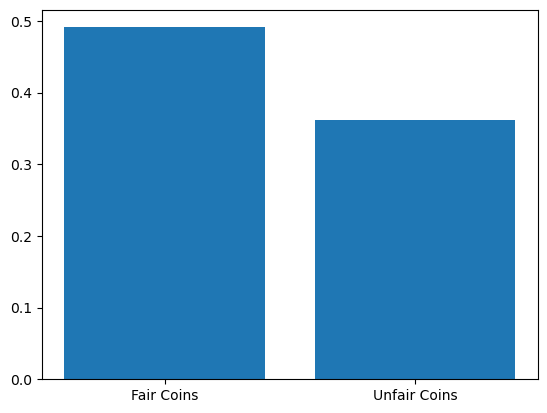

In [11]:
plt.bar(["Fair Coins", "Unfair Coins"], [game_rf, game2_rf]);

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [12]:
a = Die(np.array([1,2,3,4,5,6]))
b = Die(np.array([1,2,3,4,5,6]))
c = Die(np.array([1,2,3,4,5,6]))

Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [13]:
a.change_weight(6,5)

Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [14]:
b.change_weight(1,5)

Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [15]:
game = Game([c,c,c,c,c])
game.play(10000)

Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [16]:
game2 = Game([a,b,c,c,c])
game2.play(10000)

Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

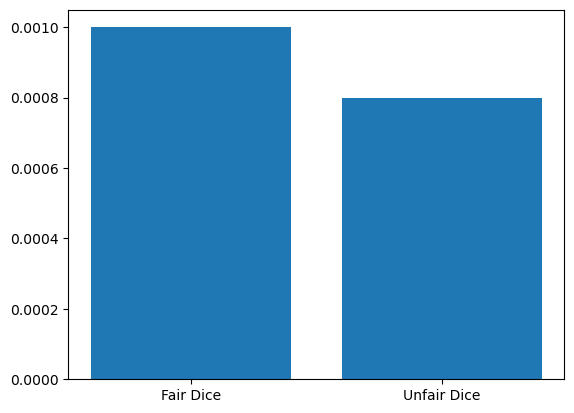

In [17]:
game_analyzer = Analyzer(game)
gj = game_analyzer.jackpot() / 10000
game2_analyzer = Analyzer(game2)
g2j = game2_analyzer.jackpot() / 10000
plt.bar(["Fair Dice", "Unfair Dice"], [gj, g2j]);

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [18]:
letters = pd.read_table('english_letters.txt', sep=" " ,header=None)

In [19]:
letter_die = Die(np.array(letters[0]))
for i in range(0,26):
    letter_die.change_weight(letters.loc[i,0],letters.loc[i,1])
letter_die.current_state()

,Weight
Face,
E,529117365.0
T,390965105.0
A,374061888.0
O,326627740.0
I,320410057.0
N,313720540.0
S,294300210.0
R,277000841.0
H,216768975.0


Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [20]:
game = Game([letter_die,letter_die,letter_die,letter_die])
game.play(1000)

Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [21]:
scrabble = pd.read_table('scrabble_words.txt', sep=" " ,header=None)

In [22]:
game_analyzer = Analyzer(game)
perms = game_analyzer.permutation_count()
i = [''.join(x) for x in perms.index]
actual_words = list(set(i).intersection(scrabble[0]))
len(actual_words)

42

Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [23]:
game2 = Game([letter_die,letter_die,letter_die,letter_die, letter_die])
game2.play(1000)

game2_analyzer = Analyzer(game2)
perms = game2_analyzer.permutation_count()
i = [''.join(x) for x in perms.index]
actual_words = list(set(i).intersection(scrabble[0]))
len(actual_words)

11

The permutations with 4 dice had more actual words.